# Welcome to the 5 lab! Now we will make a magic...

## punkt 1 - 2

подключение необходимых библиотек

In [1]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

(часть пункта 2) создание списка путей к картинам, а также разделение его на тестовый, валидный и тренировочный

In [2]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

проверка списков

In [3]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

проверка картинок

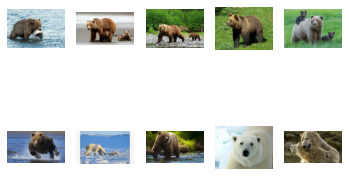

In [4]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

класс dataset, который будет хранить загруженные и преобразованные изображения и метки классов 0 - бурые мишки,     1 - полярные мишки

In [5]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=0
        elif label == 'polar_bears':
            label=1
        #print(label)  
            
        return img_transformed,label

## punkt 4

пайплайн предобработки данных и формированя набора даных, который непосредственно будет участвовать в обучении

In [6]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

проверка данных

In [7]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.0431, 0.0431, 0.0431,  ..., 0.0980, 0.1020, 0.1020],
         [0.0392, 0.0392, 0.0431,  ..., 0.1020, 0.1059, 0.1059],
         [0.0392, 0.0392, 0.0392,  ..., 0.1059, 0.1098, 0.1098],
         ...,
         [0.3059, 0.2941, 0.2824,  ..., 0.0824, 0.0745, 0.0706],
         [0.3216, 0.3137, 0.3098,  ..., 0.0824, 0.0745, 0.0706],
         [0.3098, 0.3294, 0.3490,  ..., 0.0784, 0.0745, 0.0706]],

        [[0.3020, 0.3020, 0.2980,  ..., 0.1569, 0.1529, 0.1529],
         [0.3020, 0.3020, 0.2980,  ..., 0.1608, 0.1569, 0.1529],
         [0.3059, 0.3020, 0.2980,  ..., 0.1608, 0.1569, 0.1569],
         ...,
         [0.2353, 0.2235, 0.2118,  ..., 0.1020, 0.0980, 0.0980],
         [0.2510, 0.2431, 0.2353,  ..., 0.1020, 0.0980, 0.0980],
         [0.2392, 0.2549, 0.2706,  ..., 0.1020, 0.0980, 0.0980]],

        [[0.5059, 0.5059, 0.5020,  ..., 0.2353, 0.2275, 0.2196],
         [0.5059, 0.5059, 0.5020,  ..., 0.2314, 0.2235, 0.2196],
         [0.5059, 0.5059, 0.5020,  ..., 0.2314, 0.2235, 0

## punkt 3

задание значений для количества обрабатываемых за раз изобрадений и скорости обучения

In [8]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

загрузка набора данных в dataloader

In [9]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

порверка наборов

In [10]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17
209 3


torch.Size([3, 224, 224])

модель сверточной нейросети для решения задачи классификации

In [11]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

## punkt 5

перенос данных в одно место (у меня это cpu, все работает)

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)


задание параметров обработки - оптимизация - обновлене данных и критерий ошибки, по которому сеть будеть обучаться

In [13]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.BCELoss()

цикл обучения нейросети

In [14]:
accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

def train_loop(train_loader, val_loader):
    epochs = 10
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)
            
        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
        
        accuracy_values.append(epoch_accuracy.item())
        loss_values.append(epoch_loss.item())
        
        model.eval()
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
        print('\n')

In [15]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.4909343123435974, train loss : 0.33535122871398926
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.5479987859725952


Epoch : 2, train accuracy : 0.49038055539131165, train loss : 0.2964601516723633
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.21661993861198425


Epoch : 3, train accuracy : 0.4898270070552826, train loss : 0.24936994910240173
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.19914723932743073


Epoch : 4, train accuracy : 0.49148792028427124, train loss : 0.23125208914279938
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.21771809458732605


Epoch : 5, train accuracy : 0.49038058519363403, train loss : 0.23751787841320038
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.1467246115207672


Epoch : 6, train accuracy : 0.4906574487686157, train loss : 0.22185756266117096
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.15779951214790344


Epoch : 7, train accuracy : 0.4920414686203003

In [96]:
# код на всякий случай, чтобы долго не искать если функция сломается.....
# epochs = 10

# accuracy_values = []
# loss_values = []

# val_accuracy_values = []
# val_loss_values = []
# model.train()
# for epoch in range(epochs):
#     epoch_loss = 0
#     epoch_accuracy = 0
    
#     for data, label in train_loader:
#         data = data.to(device)
#         label = label.to(device)
        
#         output = model(data)
#         loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         acc = ((output.argmax(dim=1) == label).float().mean())
#         epoch_accuracy += acc/len(train_loader)
#         epoch_loss += loss/len(train_loader)
        
#     print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
#     accuracy_values.append(epoch_accuracy.item())
#     loss_values.append(epoch_loss.item())
    
#     model.eval()
#     epoch_val_accuracy=0
#     epoch_val_loss =0
#     for data, label in val_loader:
#         data = data.to(device)
#         label = label.to(device)
        
#         val_output = model(data)
#         val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
        
        
#         acc = ((val_output.argmax(dim=1) == label).float().mean())
#         epoch_val_accuracy += acc/ len(val_loader)
#         epoch_val_loss += val_loss/ len(val_loader)
        
#     val_accuracy_values.append(epoch_val_accuracy.item())
#     val_loss_values.append(epoch_val_loss.item())
#     print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
#     print('\n')

## punkt 6

на созданных во время обучения наборах строятся графики для значений функции потерь и метрики качества

график для обучающей выборки

In [16]:
def show_results(acc, loss):
    plt.figure(figsize=(15, 5))
    plt.plot(range(10), acc, color="green")
    plt.legend(["Accuracy"])
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), loss, color="blue")
    plt.legend(["Loss"])
    plt.show() 
    
    print(acc, '\n',loss)

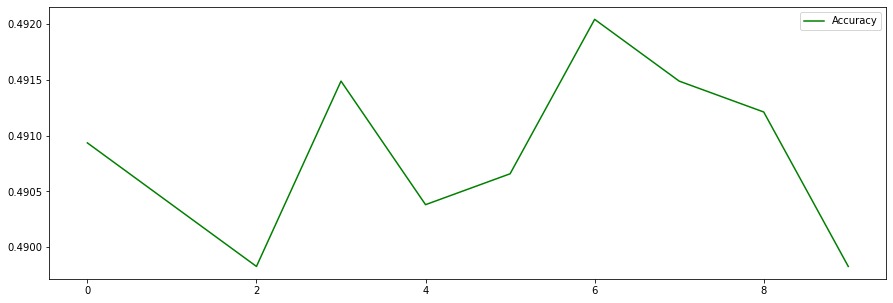

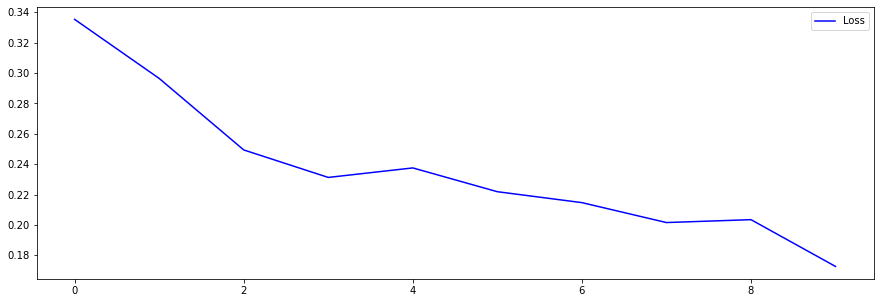

[0.4909343123435974, 0.49038055539131165, 0.4898270070552826, 0.49148792028427124, 0.49038058519363403, 0.4906574487686157, 0.4920414686203003, 0.49148789048194885, 0.49121108651161194, 0.48982691764831543] 
 [0.33535122871398926, 0.2964601516723633, 0.24936994910240173, 0.23125208914279938, 0.23751787841320038, 0.22185756266117096, 0.21466335654258728, 0.20154376327991486, 0.20344758033752441, 0.17263774573802948]


In [17]:
show_results(accuracy_values, loss_values)

график для валидационной выборки

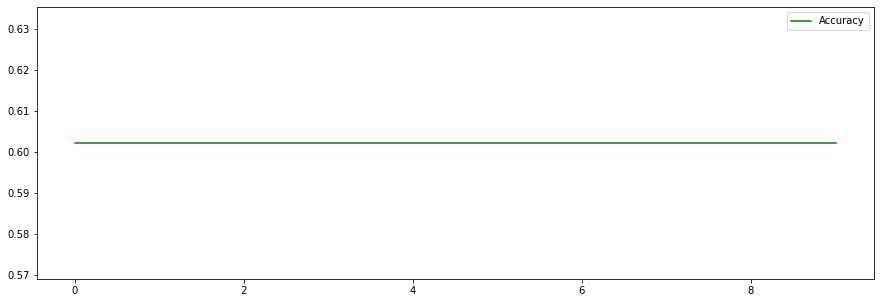

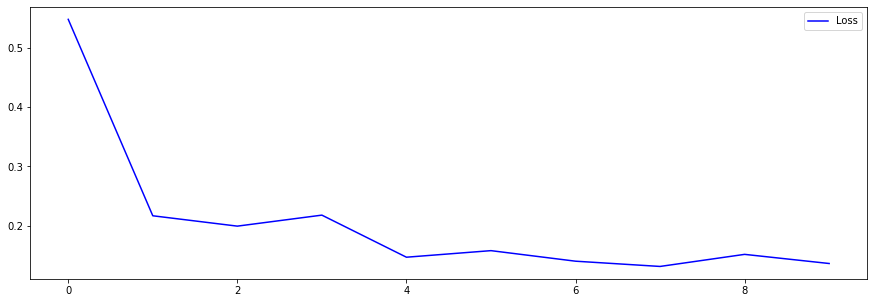

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374] 
 [0.5479987859725952, 0.21661993861198425, 0.19914723932743073, 0.21771809458732605, 0.1467246115207672, 0.15779951214790344, 0.1400066316127777, 0.1311415284872055, 0.15151751041412354, 0.13609568774700165]


In [18]:
show_results(val_accuracy_values, val_loss_values)


# plt.figure(figsize=(15, 5))
# plt.plot(range(10), val_accuracy_values, color="red")
# plt.legend(["Accuracy_val"])
# plt.show()

# plt.figure(figsize=(15, 5))
# plt.plot(range(10),val_loss_values, color="gray")
# plt.legend(["Loss_val"])
# plt.show()

## train loop 1

Epoch : 1, train accuracy : 0.49176472425460815, train loss : 0.12885847687721252
Epoch : 1, val_accuracy : 0.5893333554267883, val_loss : 0.10350955277681351


Epoch : 2, train accuracy : 0.49281051754951477, train loss : 0.13161282241344452
Epoch : 2, val_accuracy : 0.5893333554267883, val_loss : 0.0971764624118805


Epoch : 3, train accuracy : 0.4896732568740845, train loss : 0.12614482641220093
Epoch : 3, val_accuracy : 0.5893333554267883, val_loss : 0.08160874992609024


Epoch : 4, train accuracy : 0.49281051754951477, train loss : 0.12881401181221008
Epoch : 4, val_accuracy : 0.5893333554267883, val_loss : 0.06903727352619171


Epoch : 5, train accuracy : 0.4907189905643463, train loss : 0.14717194437980652
Epoch : 5, val_accuracy : 0.5893333554267883, val_loss : 0.07979314774274826


Epoch : 6, train accuracy : 0.4928104877471924, train loss : 0.1310923546552658
Epoch : 6, val_accuracy : 0.5893333554267883, val_loss : 0.08904077857732773


Epoch : 7, train accuracy : 0.493856251

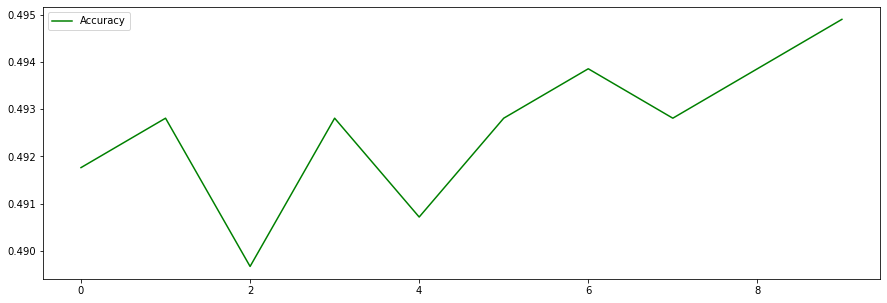

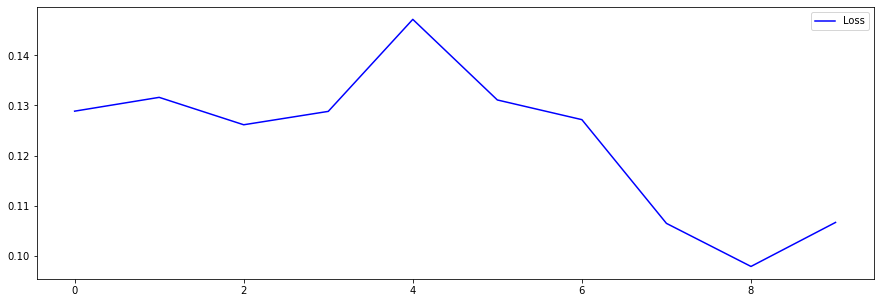

[0.49176472425460815, 0.49281051754951477, 0.4896732568740845, 0.49281051754951477, 0.4907189905643463, 0.4928104877471924, 0.4938562512397766, 0.49281045794487, 0.4938562512397766, 0.49490201473236084] 
 [0.12885847687721252, 0.13161282241344452, 0.12614482641220093, 0.12881401181221008, 0.14717194437980652, 0.1310923546552658, 0.1271653026342392, 0.10647496581077576, 0.0978844165802002, 0.10666579008102417]


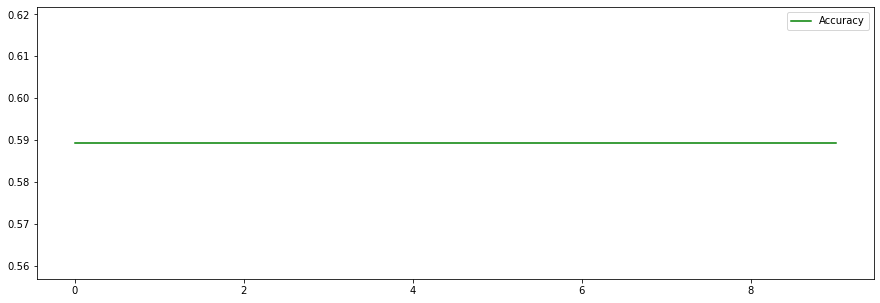

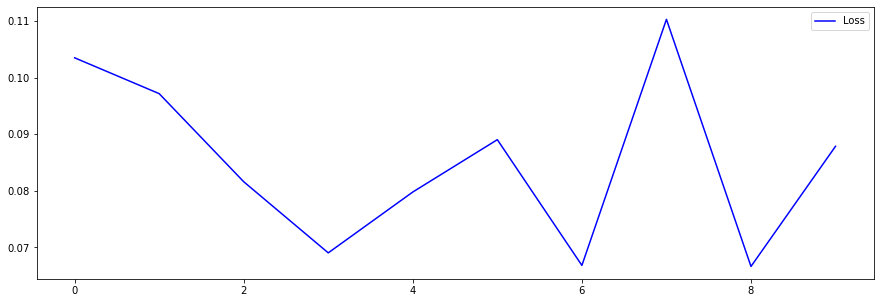

[0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883] 
 [0.10350955277681351, 0.0971764624118805, 0.08160874992609024, 0.06903727352619171, 0.07979314774274826, 0.08904077857732773, 0.0668209046125412, 0.11030357331037521, 0.06663748621940613, 0.08787298947572708]


In [21]:
lear = 0.001
batch_size = 50

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)


## train loop 2

Epoch : 1, train accuracy : 0.49437907338142395, train loss : 0.12855307757854462
Epoch : 1, val_accuracy : 0.6183333396911621, val_loss : 0.07660499215126038


Epoch : 2, train accuracy : 0.4933006465435028, train loss : 0.10447964817285538
Epoch : 2, val_accuracy : 0.6183333396911621, val_loss : 0.07077328860759735


Epoch : 3, train accuracy : 0.4933006465435028, train loss : 0.10393522679805756
Epoch : 3, val_accuracy : 0.6183333396911621, val_loss : 0.048840850591659546


Epoch : 4, train accuracy : 0.49437904357910156, train loss : 0.0985916331410408
Epoch : 4, val_accuracy : 0.6183333396911621, val_loss : 0.05439731106162071


Epoch : 5, train accuracy : 0.49653592705726624, train loss : 0.09715010225772858
Epoch : 5, val_accuracy : 0.6183333396911621, val_loss : 0.06667647510766983


Epoch : 6, train accuracy : 0.49437904357910156, train loss : 0.09367047995328903
Epoch : 6, val_accuracy : 0.6183333396911621, val_loss : 0.09212926030158997


Epoch : 7, train accuracy : 0.494379

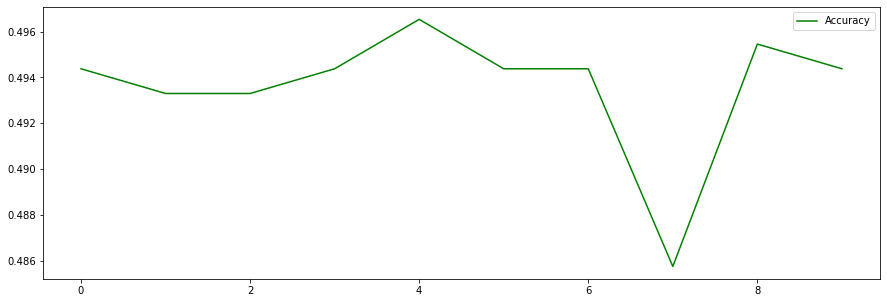

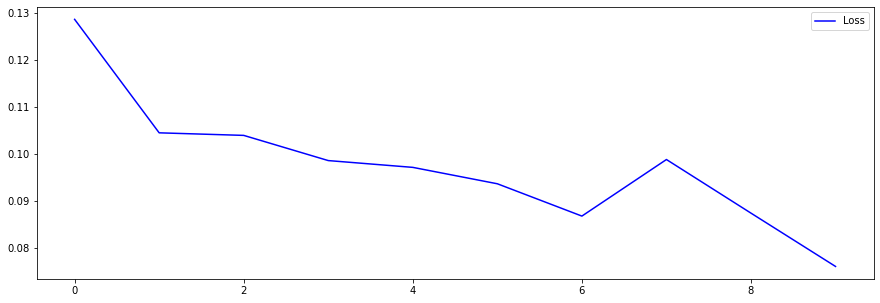

[0.49437907338142395, 0.4933006465435028, 0.4933006465435028, 0.49437904357910156, 0.49653592705726624, 0.49437904357910156, 0.49437907338142395, 0.4857516288757324, 0.4954574704170227, 0.49437910318374634] 
 [0.12855307757854462, 0.10447964817285538, 0.10393522679805756, 0.0985916331410408, 0.09715010225772858, 0.09367047995328903, 0.08681631088256836, 0.0988154485821724, 0.08744081854820251, 0.0761311873793602]


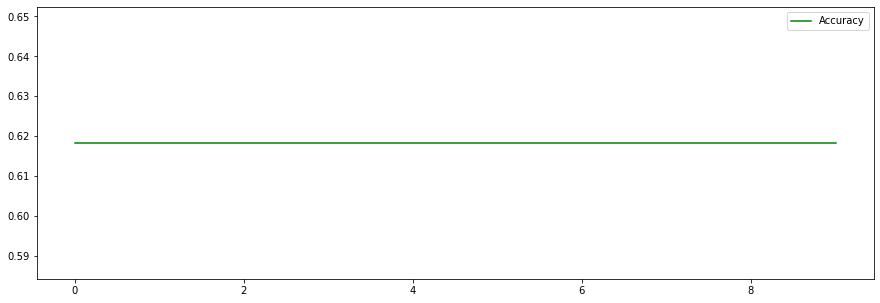

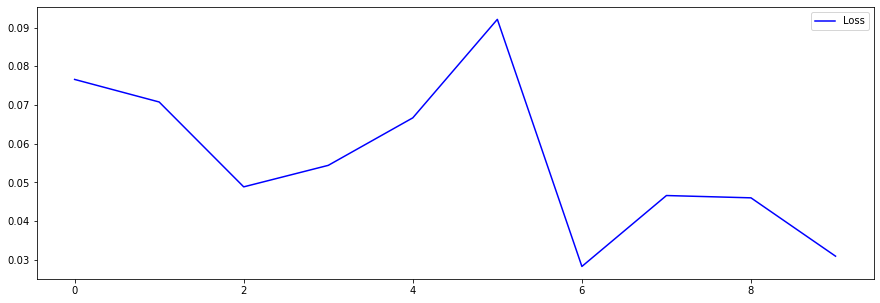

[0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621] 
 [0.07660499215126038, 0.07077328860759735, 0.048840850591659546, 0.05439731106162071, 0.06667647510766983, 0.09212926030158997, 0.028272898867726326, 0.0465993657708168, 0.04600350558757782, 0.030925806611776352]


In [22]:
lear = 0.001
batch_size = 200

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 3

Epoch : 1, train accuracy : 0.49490198493003845, train loss : 0.1030813530087471
Epoch : 1, val_accuracy : 0.5893333554267883, val_loss : 0.07117310911417007


Epoch : 2, train accuracy : 0.48967328667640686, train loss : 0.08231169730424881
Epoch : 2, val_accuracy : 0.5893333554267883, val_loss : 0.07600165158510208


Epoch : 3, train accuracy : 0.49281054735183716, train loss : 0.10353545099496841
Epoch : 3, val_accuracy : 0.5893333554267883, val_loss : 0.05897018313407898


Epoch : 4, train accuracy : 0.4907189905643463, train loss : 0.07527570426464081
Epoch : 4, val_accuracy : 0.5893333554267883, val_loss : 0.062712162733078


Epoch : 5, train accuracy : 0.49176472425460815, train loss : 0.08476822078227997
Epoch : 5, val_accuracy : 0.5893333554267883, val_loss : 0.06145509332418442


Epoch : 6, train accuracy : 0.49176472425460815, train loss : 0.07334820181131363
Epoch : 6, val_accuracy : 0.5893333554267883, val_loss : 0.05947231501340866


Epoch : 7, train accuracy : 0.48967319

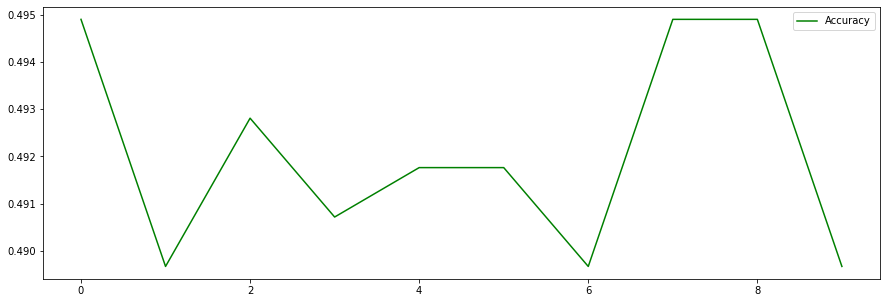

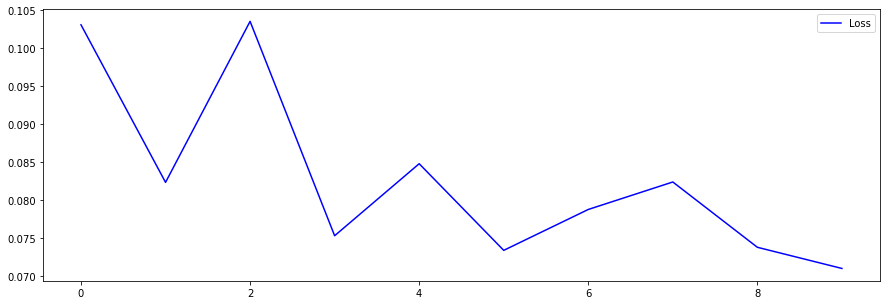

[0.49490198493003845, 0.48967328667640686, 0.49281054735183716, 0.4907189905643463, 0.49176472425460815, 0.49176472425460815, 0.4896731972694397, 0.4949019253253937, 0.49490198493003845, 0.4896732568740845] 
 [0.1030813530087471, 0.08231169730424881, 0.10353545099496841, 0.07527570426464081, 0.08476822078227997, 0.07334820181131363, 0.07873736321926117, 0.0823611244559288, 0.07375206798315048, 0.07096325606107712]


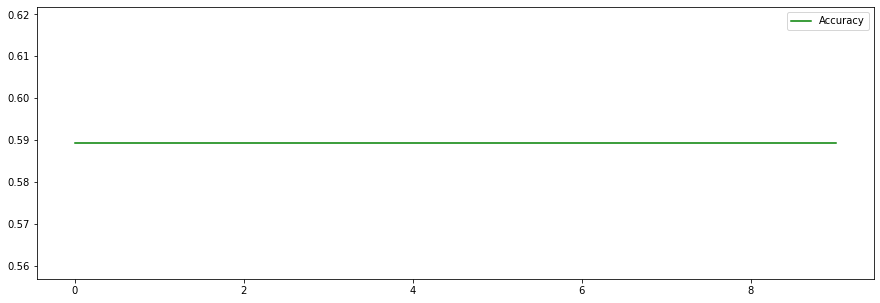

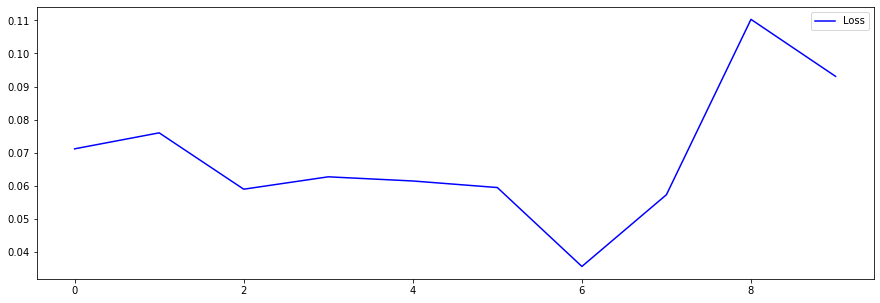

[0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883] 
 [0.07117310911417007, 0.07600165158510208, 0.05897018313407898, 0.062712162733078, 0.06145509332418442, 0.05947231501340866, 0.035625457763671875, 0.05730610340833664, 0.11030111461877823, 0.09307877719402313]


In [23]:
lear = 0.0005
batch_size = 50

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 4

Epoch : 1, train accuracy : 0.49148789048194885, train loss : 0.10199984908103943
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.11033850908279419


Epoch : 2, train accuracy : 0.4920414686203003, train loss : 0.0817924290895462
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.06049036979675293


Epoch : 3, train accuracy : 0.49148789048194885, train loss : 0.08822844922542572
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.041244350373744965


Epoch : 4, train accuracy : 0.49176475405693054, train loss : 0.07496774196624756
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.057487018406391144


Epoch : 5, train accuracy : 0.4895501732826233, train loss : 0.07686982303857803
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.04371942579746246


Epoch : 6, train accuracy : 0.49176475405693054, train loss : 0.06721388548612595
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.036005113273859024


Epoch : 7, train accuracy : 0.4903806447

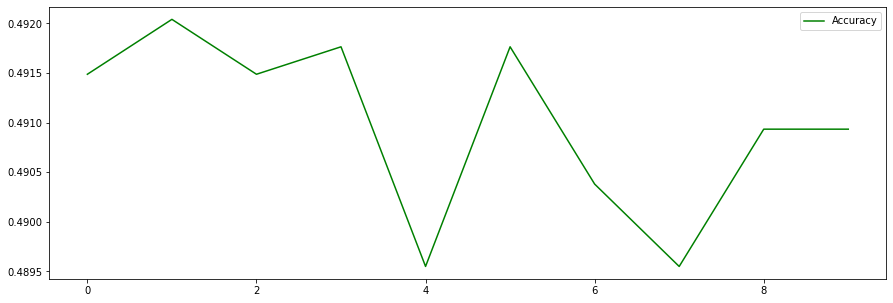

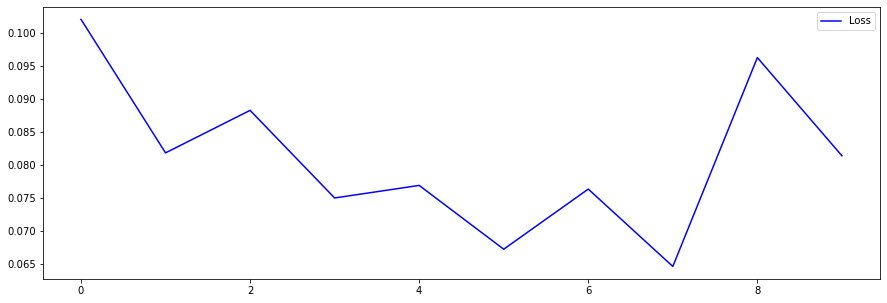

[0.49148789048194885, 0.4920414686203003, 0.49148789048194885, 0.49176475405693054, 0.4895501732826233, 0.49176475405693054, 0.4903806447982788, 0.4895501136779785, 0.490934282541275, 0.49093419313430786] 
 [0.10199984908103943, 0.0817924290895462, 0.08822844922542572, 0.07496774196624756, 0.07686982303857803, 0.06721388548612595, 0.07631497085094452, 0.06460615247488022, 0.0962129458785057, 0.0813581794500351]


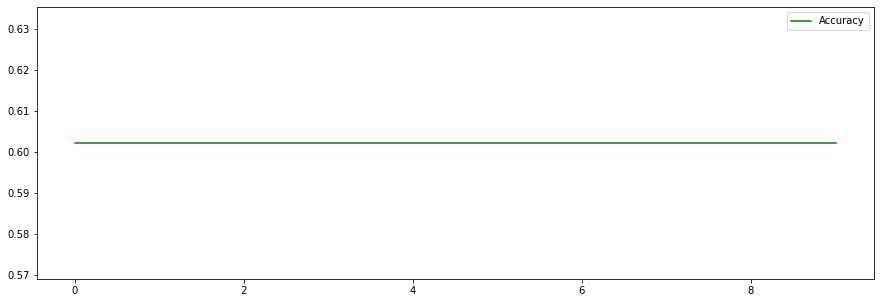

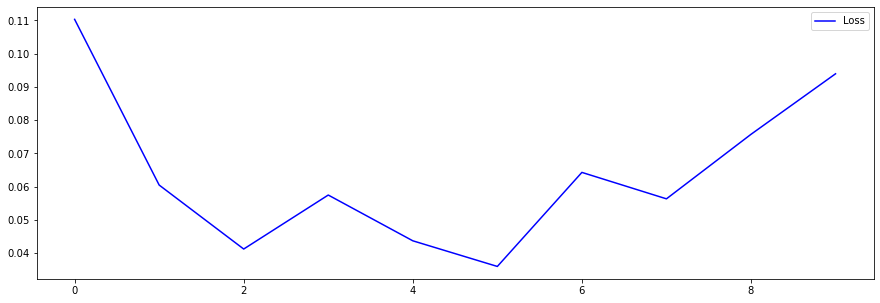

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374] 
 [0.11033850908279419, 0.06049036979675293, 0.041244350373744965, 0.057487018406391144, 0.04371942579746246, 0.036005113273859024, 0.06429749727249146, 0.056344591081142426, 0.07575131952762604, 0.09396255016326904]


In [24]:
lear = 0.0005
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 5

Epoch : 1, train accuracy : 0.48898690938949585, train loss : 0.0814422219991684
Epoch : 1, val_accuracy : 0.6183333396911621, val_loss : 0.03641585260629654


Epoch : 2, train accuracy : 0.49761441349983215, train loss : 0.08507406711578369
Epoch : 2, val_accuracy : 0.6183333396911621, val_loss : 0.054281242191791534


Epoch : 3, train accuracy : 0.48898690938949585, train loss : 0.08015087246894836
Epoch : 3, val_accuracy : 0.6183333396911621, val_loss : 0.049203865230083466


Epoch : 4, train accuracy : 0.48683005571365356, train loss : 0.07848808169364929
Epoch : 4, val_accuracy : 0.6183333396911621, val_loss : 0.04180474951863289


Epoch : 5, train accuracy : 0.49437910318374634, train loss : 0.0680038258433342
Epoch : 5, val_accuracy : 0.6183333396911621, val_loss : 0.052771925926208496


Epoch : 6, train accuracy : 0.4900653660297394, train loss : 0.06844532489776611
Epoch : 6, val_accuracy : 0.6183333396911621, val_loss : 0.03322703763842583


Epoch : 7, train accuracy : 0.4922

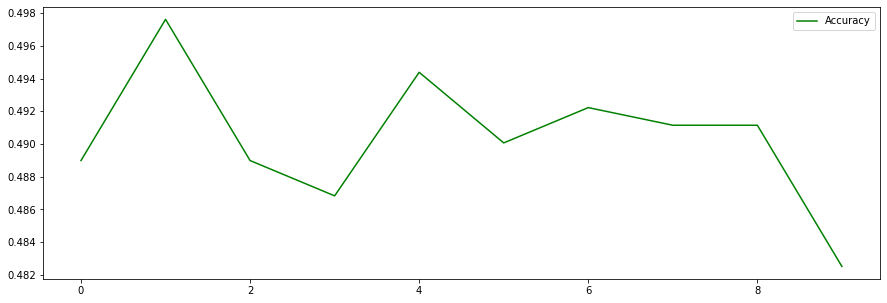

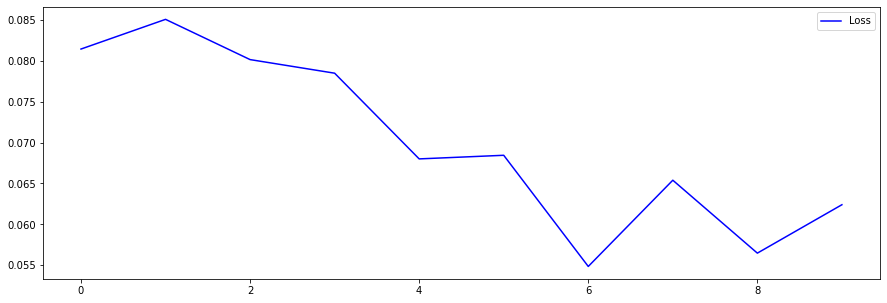

[0.48898690938949585, 0.49761441349983215, 0.48898690938949585, 0.48683005571365356, 0.49437910318374634, 0.4900653660297394, 0.4922221899032593, 0.4911438226699829, 0.49114376306533813, 0.4825162887573242] 
 [0.0814422219991684, 0.08507406711578369, 0.08015087246894836, 0.07848808169364929, 0.0680038258433342, 0.06844532489776611, 0.05484684929251671, 0.06539534032344818, 0.05647585168480873, 0.06239764392375946]


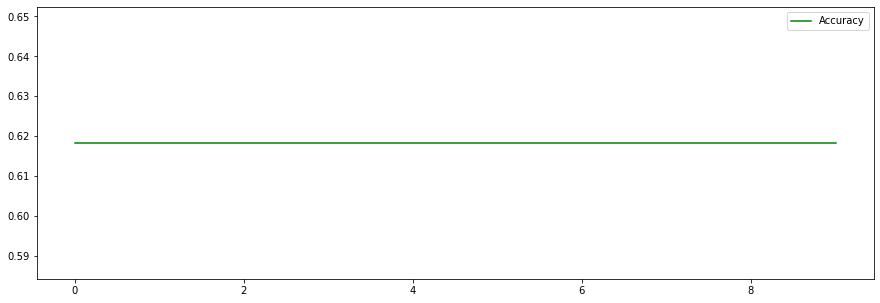

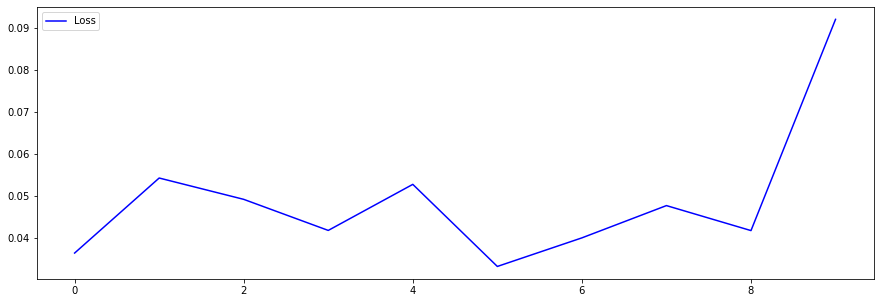

[0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621] 
 [0.03641585260629654, 0.054281242191791534, 0.049203865230083466, 0.04180474951863289, 0.052771925926208496, 0.03322703763842583, 0.04003089666366577, 0.04771604388952255, 0.04176517203450203, 0.09206096827983856]


In [25]:
lear = 0.0005
batch_size = 200

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 6

Epoch : 1, train accuracy : 0.49176472425460815, train loss : 0.1899375021457672
Epoch : 1, val_accuracy : 0.5893333554267883, val_loss : 0.08806616067886353


Epoch : 2, train accuracy : 0.49385619163513184, train loss : 0.16903837025165558
Epoch : 2, val_accuracy : 0.5893333554267883, val_loss : 0.1828516274690628


Epoch : 3, train accuracy : 0.4896732270717621, train loss : 0.2125128209590912
Epoch : 3, val_accuracy : 0.5893333554267883, val_loss : 0.1177617534995079


Epoch : 4, train accuracy : 0.48967334628105164, train loss : 0.16643208265304565
Epoch : 4, val_accuracy : 0.5893333554267883, val_loss : 0.11594746261835098


Epoch : 5, train accuracy : 0.4938562512397766, train loss : 0.14004811644554138
Epoch : 5, val_accuracy : 0.5893333554267883, val_loss : 0.12545424699783325


Epoch : 6, train accuracy : 0.4928104877471924, train loss : 0.16161443293094635
Epoch : 6, val_accuracy : 0.5893333554267883, val_loss : 0.14760500192642212


Epoch : 7, train accuracy : 0.48967322707

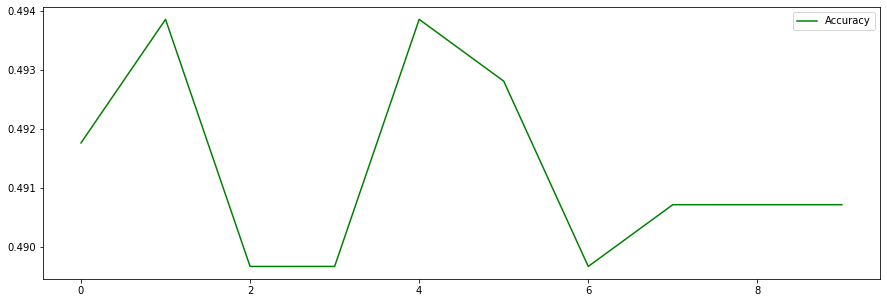

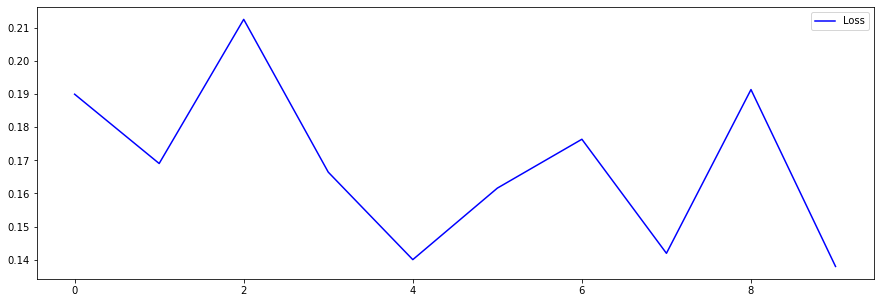

[0.49176472425460815, 0.49385619163513184, 0.4896732270717621, 0.48967334628105164, 0.4938562512397766, 0.4928104877471924, 0.4896732270717621, 0.4907189607620239, 0.4907190501689911, 0.4907189905643463] 
 [0.1899375021457672, 0.16903837025165558, 0.2125128209590912, 0.16643208265304565, 0.14004811644554138, 0.16161443293094635, 0.17635375261306763, 0.14195425808429718, 0.19133634865283966, 0.1379932314157486]


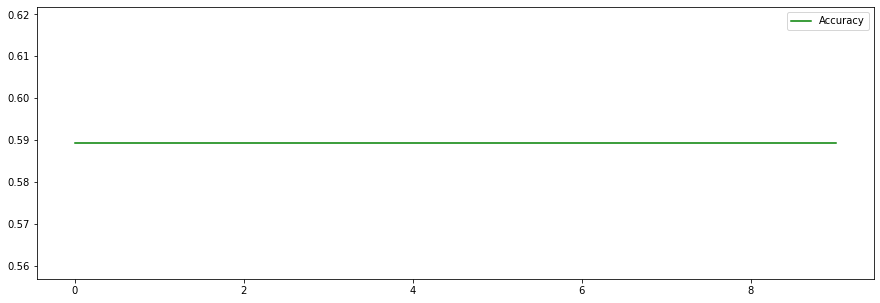

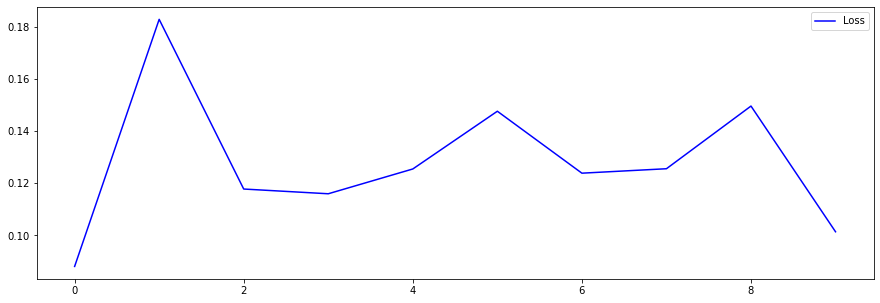

[0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883] 
 [0.08806616067886353, 0.1828516274690628, 0.1177617534995079, 0.11594746261835098, 0.12545424699783325, 0.14760500192642212, 0.12384669482707977, 0.1255488395690918, 0.1495906114578247, 0.10137089341878891]


In [26]:
lear = 0.005
batch_size = 50

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 7

Epoch : 1, train accuracy : 0.49038055539131165, train loss : 0.2123686671257019
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.1347879320383072


Epoch : 2, train accuracy : 0.49148786067962646, train loss : 0.17070509493350983
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.0996766909956932


Epoch : 3, train accuracy : 0.4931488037109375, train loss : 0.10668686777353287
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.1142367348074913


Epoch : 4, train accuracy : 0.4928719997406006, train loss : 0.12323751300573349
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.1085997223854065


Epoch : 5, train accuracy : 0.49121102690696716, train loss : 0.11123432964086533
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.06584923714399338


Epoch : 6, train accuracy : 0.4925951063632965, train loss : 0.13896618783473969
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.09941193461418152


Epoch : 7, train accuracy : 0.49425607919692993,

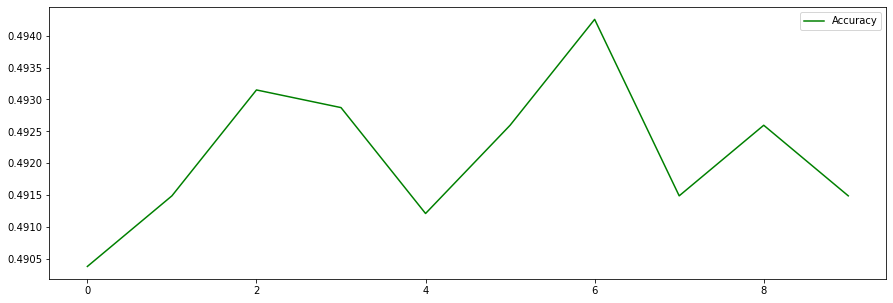

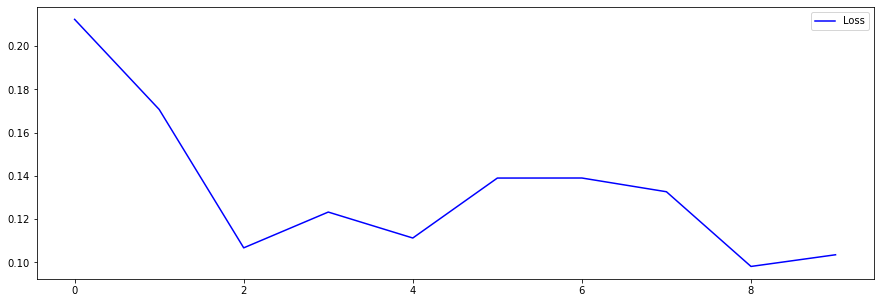

[0.49038055539131165, 0.49148786067962646, 0.4931488037109375, 0.4928719997406006, 0.49121102690696716, 0.4925951063632965, 0.49425607919692993, 0.49148792028427124, 0.4925951361656189, 0.4914878308773041] 
 [0.2123686671257019, 0.17070509493350983, 0.10668686777353287, 0.12323751300573349, 0.11123432964086533, 0.13896618783473969, 0.13898876309394836, 0.13263295590877533, 0.09808377176523209, 0.10348723828792572]


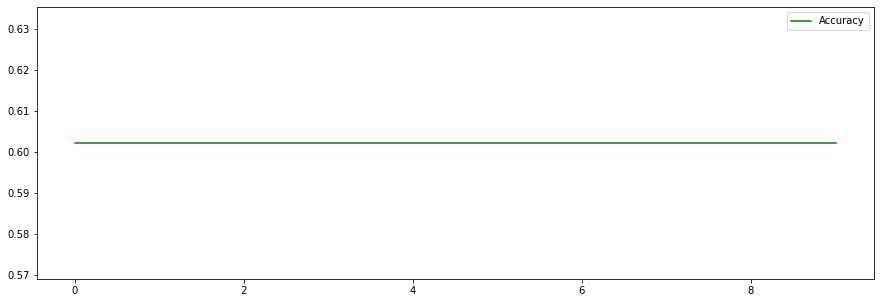

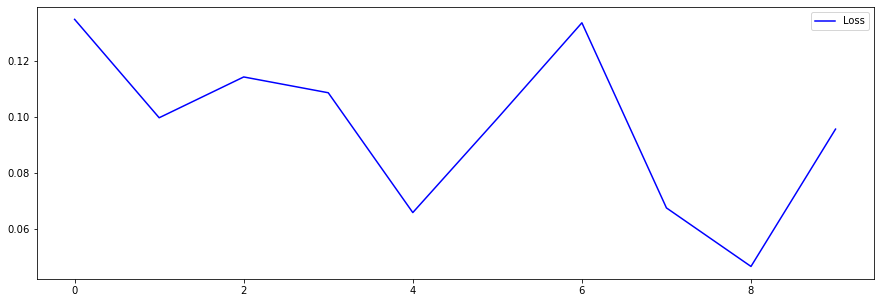

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374] 
 [0.1347879320383072, 0.0996766909956932, 0.1142367348074913, 0.1085997223854065, 0.06584923714399338, 0.09941193461418152, 0.13356074690818787, 0.06751397997140884, 0.046625349670648575, 0.09562473744153976]


In [27]:
lear = 0.005
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## train loop 8

Epoch : 1, train accuracy : 0.48467326164245605, train loss : 0.10554291307926178
Epoch : 1, val_accuracy : 0.6183333396911621, val_loss : 0.09787439554929733


Epoch : 2, train accuracy : 0.49437907338142395, train loss : 0.16573305428028107
Epoch : 2, val_accuracy : 0.6183333396911621, val_loss : 0.085870161652565


Epoch : 3, train accuracy : 0.49653592705726624, train loss : 0.1246635839343071
Epoch : 3, val_accuracy : 0.6183333396911621, val_loss : 0.06500115990638733


Epoch : 4, train accuracy : 0.4933006465435028, train loss : 0.0864151194691658
Epoch : 4, val_accuracy : 0.6183333396911621, val_loss : 0.05568313226103783


Epoch : 5, train accuracy : 0.4846732020378113, train loss : 0.0888613611459732
Epoch : 5, val_accuracy : 0.6183333396911621, val_loss : 0.046033430844545364


Epoch : 6, train accuracy : 0.490065336227417, train loss : 0.11050033569335938
Epoch : 6, val_accuracy : 0.6183333396911621, val_loss : 0.048941727727651596


Epoch : 7, train accuracy : 0.49006539583

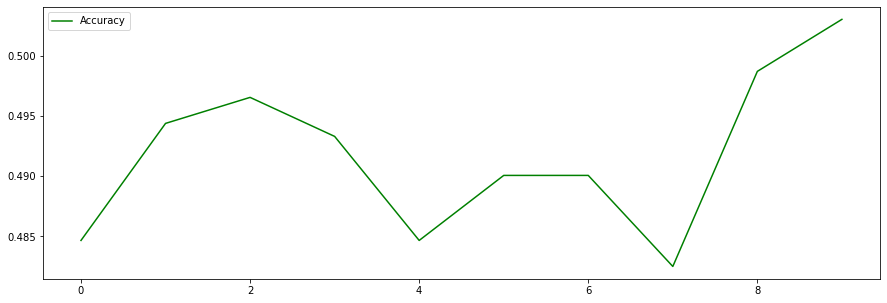

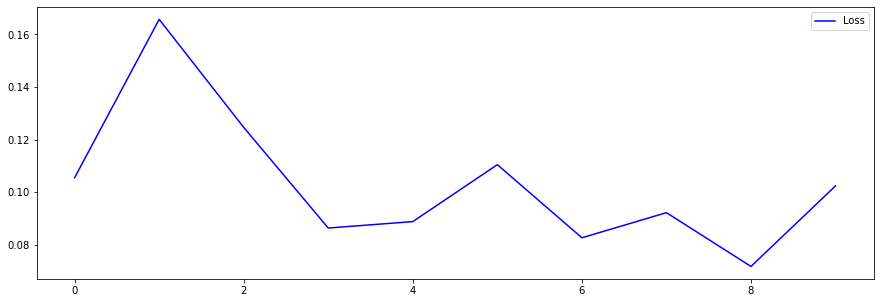

[0.48467326164245605, 0.49437907338142395, 0.49653592705726624, 0.4933006465435028, 0.4846732020378113, 0.490065336227417, 0.49006539583206177, 0.482516348361969, 0.4986927807331085, 0.5030065774917603] 
 [0.10554291307926178, 0.16573305428028107, 0.1246635839343071, 0.0864151194691658, 0.0888613611459732, 0.11050033569335938, 0.08271543681621552, 0.09225683659315109, 0.07181523740291595, 0.10244154930114746]


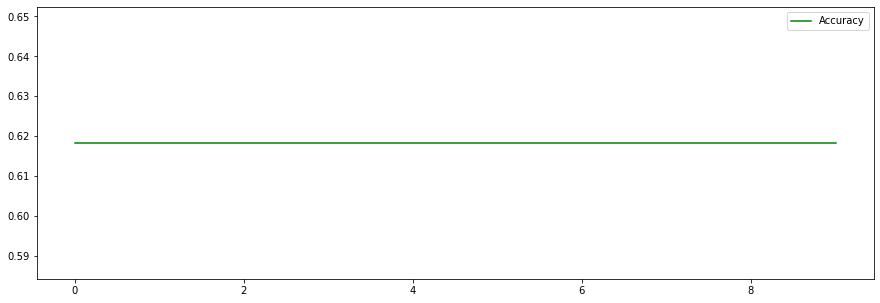

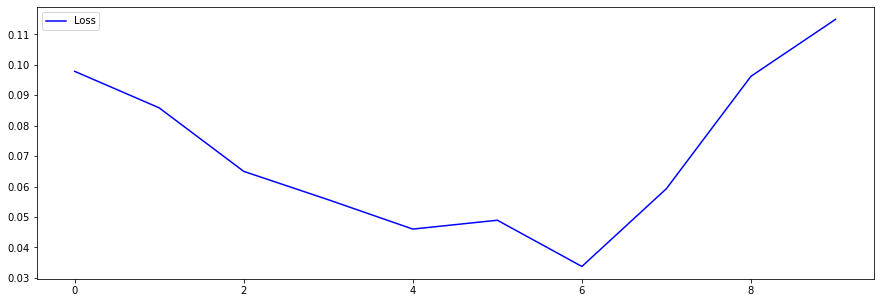

[0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621, 0.6183333396911621] 
 [0.09787439554929733, 0.085870161652565, 0.06500115990638733, 0.05568313226103783, 0.046033430844545364, 0.048941727727651596, 0.03375659137964249, 0.05931814759969711, 0.09625190496444702, 0.11494825780391693]


In [28]:
lear = 0.005
batch_size = 200

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## punkt 9

сохранение модели 

In [29]:
torch.save(model.state_dict(), os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt"))

## punkt 10

повторная инициализация модели

In [30]:
mymodel = Cnn()
mymodel.load_state_dict(torch.load(os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt")))

<All keys matched successfully>

запуск модеи на тестовых данных

In [35]:
mymodel.eval()

test_loss = 0
test_accuracy = 0
    
for data, label in test_loader:
    data = data.to(device)
    label = label.to(device)

    output = mymodel(data)
    loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
    
    acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
    test_accuracy += acc / len(test_loader)
    test_loss += float(loss.detach()) / len(test_loader)

получение значений точности и потерь

In [36]:
print(test_accuracy, test_loss)

1.0 0.14043567329645157


проверка модели на 2х рандомных картинках

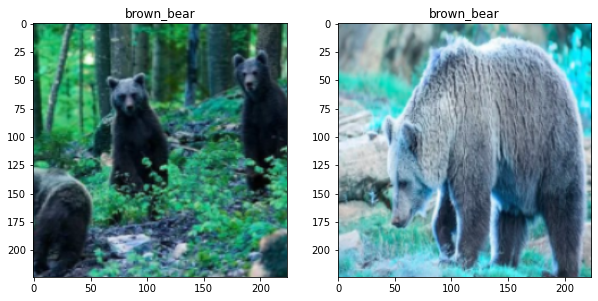

In [38]:
import random
plt.figure(figsize=(10, 5))

for j in range(2):
  index = random.randint(0, len(test_data))
  plt.subplot(1, 2, j + 1)
  plt.title("brown_bear" if (1 if  model(test_data[index][0].unsqueeze(dim=0))[0] >= 0.5 else 0) == 0 else "polar_bear")
  plt.imshow(test_data[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])

## Ураааа! Чудо свершилось!!! Теперь ждем атаку нейросетей...

просто проверка на коммит...